<strong>Цветков Сергей</strong>

Домашнее задание 2. Пример визуального анализа данных по оттоку клиентов телеком-оператора. 
Провести визуальный анализ данных по аналогии с Lesson2_1.
Вам необходимо поместить в основной каталог юпитера этот файл и файл с данными telecom_churn.csv.
В пустые ячейки необходимо ввести код программы, ввыполнить его и получить результат в соответствии с заданием.
После выполнения всех заданий, дополнительно, сохраняем тетрадь юпитера в pdf формате.
Для этого шелкаем правой кнопкой и в меню выбираем "Сохранить страницу как", вводим имя файла и выбираем формат pdf.
Отчет будет включать два файла.
Файл юпитера для проверки.
Файл в формате pdf для цифрового следа.

In [25]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Загрузка данных

In [26]:
df = pd.read_csv('telecom_churn.csv')
print(df.shape)

(3333, 20)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account_length          3333 non-null   int64  
 2   Area_code               3333 non-null   int64  
 3   International_plan      3333 non-null   object 
 4   Voice_mail_plan         3333 non-null   object 
 5   Number_vmail_messages   3333 non-null   int64  
 6   Total_day_minutes       3333 non-null   float64
 7   Total_day_calls         3333 non-null   int64  
 8   Total_day_charge        3333 non-null   float64
 9   Total_eve_minutes       3333 non-null   float64
 10  Total_eve_calls         3333 non-null   int64  
 11  Total_eve_charge        3333 non-null   float64
 12  Total_night_minutes     3333 non-null   float64
 13  Total_night_calls       3333 non-null   int64  
 14  Total_night_charge      3333 non-null   

Если есть нулевые объекты. Оставляем только ненулевые.

In [28]:
df = df.dropna()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account_length          3333 non-null   int64  
 2   Area_code               3333 non-null   int64  
 3   International_plan      3333 non-null   object 
 4   Voice_mail_plan         3333 non-null   object 
 5   Number_vmail_messages   3333 non-null   int64  
 6   Total_day_minutes       3333 non-null   float64
 7   Total_day_calls         3333 non-null   int64  
 8   Total_day_charge        3333 non-null   float64
 9   Total_eve_minutes       3333 non-null   float64
 10  Total_eve_calls         3333 non-null   int64  
 11  Total_eve_charge        3333 non-null   float64
 12  Total_night_minutes     3333 non-null   float64
 13  Total_night_calls       3333 non-null   int64  
 14  Total_night_charge      3333 non-null   

Некоторые признаки, которые pandas считал как object, явно приведем к типам float или int, а для некоторых поменяем типы.

In [30]:
df['Churn'] = df.Churn.astype('int64')

Оставим только те признаки, которые мы будем в дальнейшем использовать. Выводим "голову" полученного файла

In [31]:
df.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Строим пример графика для нескольких параметров (строим график зависимости количества звонков от лояльности пользователей)

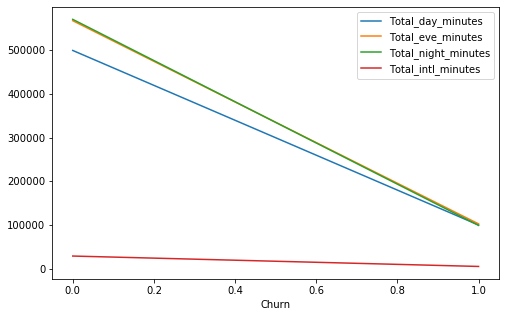

In [32]:
churn_df = df[[x for x in df.columns if 'minutes' in  x] + ['Churn']]
churn_df.groupby('Churn').sum().plot();

Строим пример гистограммы для нескольких параметров

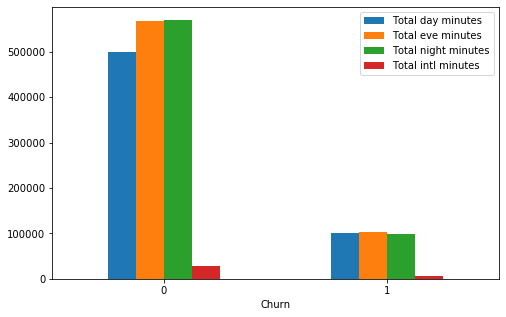

In [11]:
churn_df.groupby('Churn').sum().plot(kind='bar', rot=0);

In [ ]:
Из гистограммы видно, что лояльные пользователи совершают гораздо больше звонков во всех временных отрезках

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные scatter plots(диаграммы рассеяния) для соответствующих пар признаков.

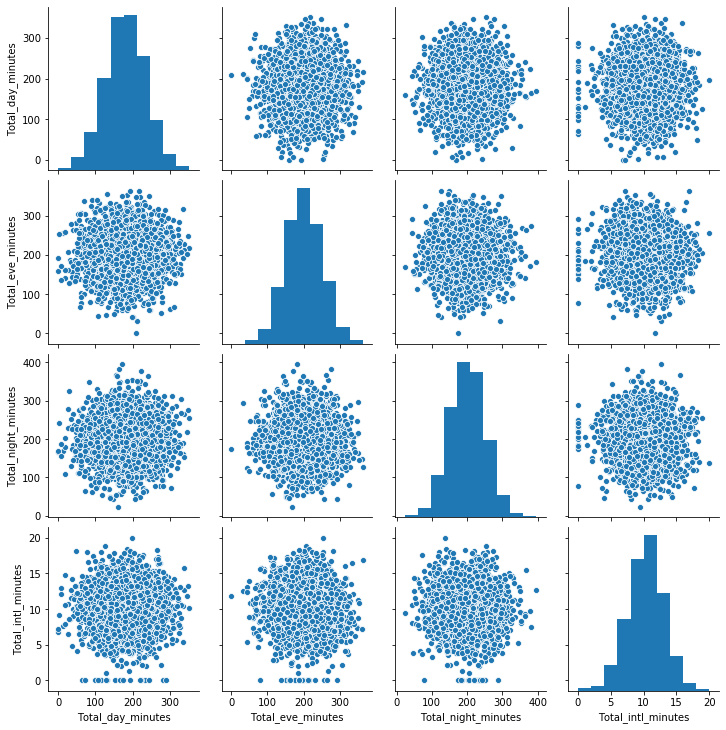

In [33]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Total_day_minutes', 'Total_eve_minutes', 'Total_night_minutes', 'Total_intl_minutes']])

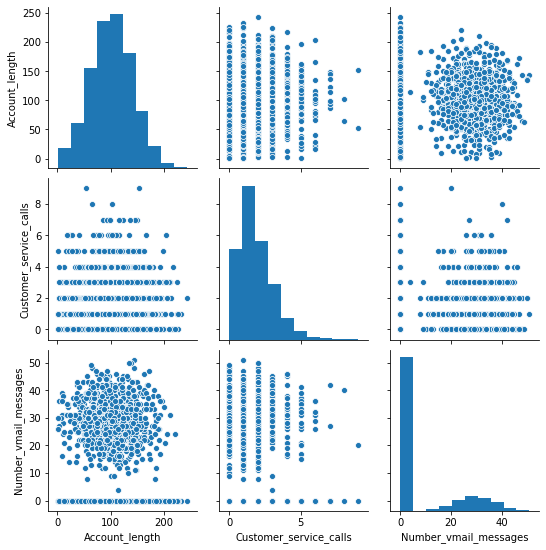

In [34]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Account_length', 'Customer_service_calls', 'Number_vmail_messages']])

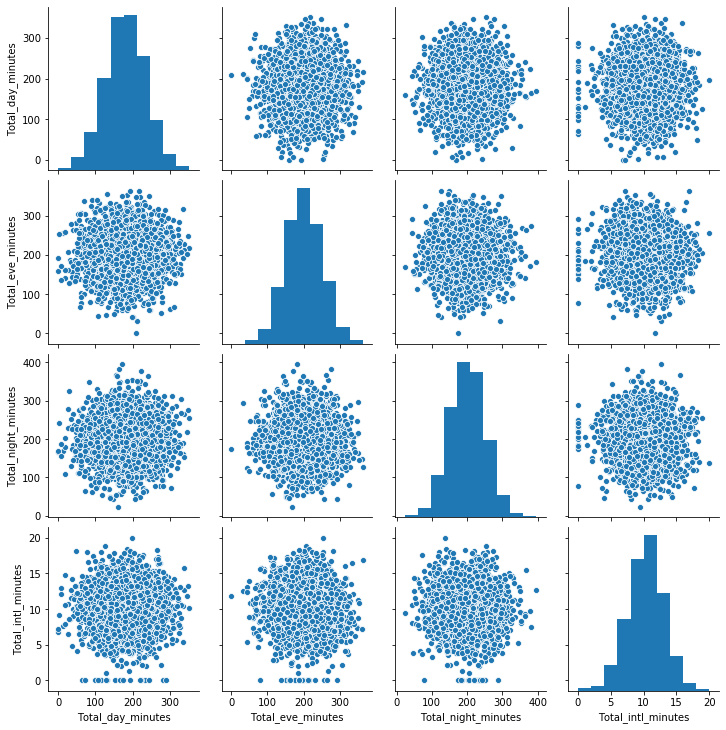

In [35]:
sns.pairplot(df[['Total_day_minutes', 'Total_eve_minutes', 'Total_night_minutes', 'Total_intl_minutes']]).savefig('Fig1')

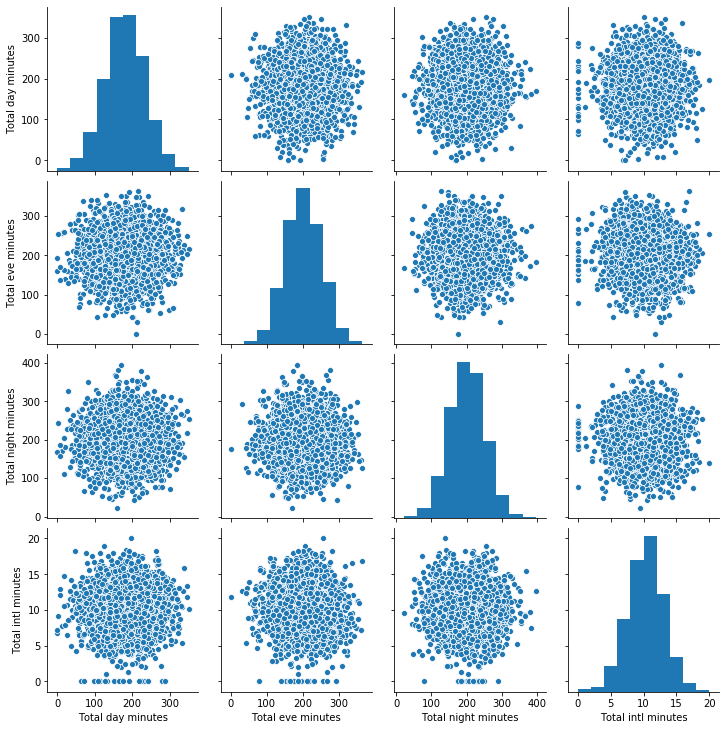

In [16]:
from IPython.display import Image
Image('fig1.png')

Ядерная оценка плотности 

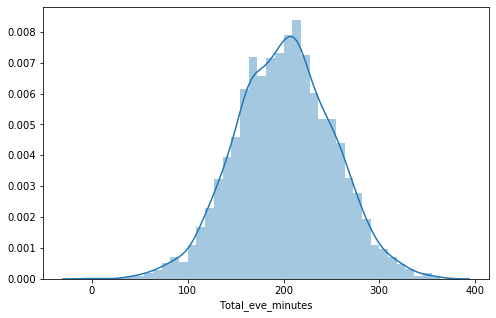

In [36]:
sns.distplot(df.Total_eve_minutes)

joint plot — это гибрид scatter plot и histogram.

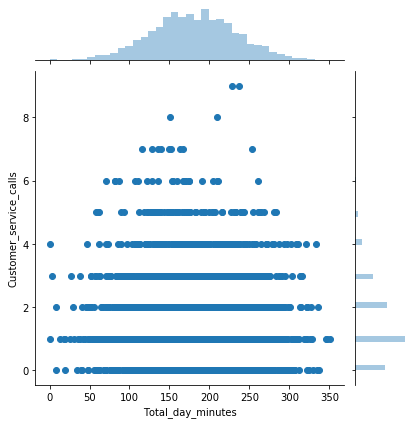

In [38]:
sns.jointplot(x='Total_day_minutes', y='Customer_service_calls', 
              data=df, kind='scatter')

In [49]:
df.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Визуализируем суммарные продажи игр по жанрам и игровым платформам.

In [51]:
platform_genre_sales = df.pivot_table(
                        index='State', 
                        columns='Account_length', 
                        values='Customer_service_calls', 
                        aggfunc=sum).fillna(0).applymap(float)

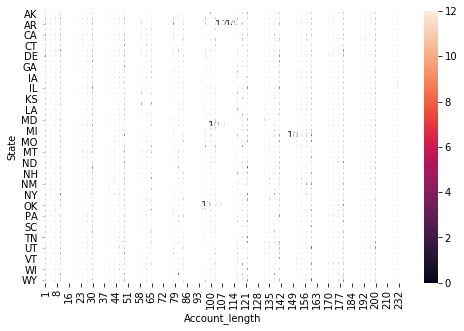

In [52]:
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

Библиотека plotly(интерактивная графика). Импортируем все необходимые модули и инициализируем plotly с помощью команды init_notebook_mode

In [53]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [ ]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Можно сразу сохранить график в виде html-файла.

'file://C:\\Users\\dashk\\Lesson2\\years_stats.html'